<a href="https://colab.research.google.com/github/singhmankrit/rl-chaos-control/blob/main/CMNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coupled Map Networks (CMNs)
Coupled Map Networks are used extensively to model dynamics of systems that have multiple interacting entities that have their own set of dynamics. The next state of a CMN is a function of the current state of all entities and the topology of their interactions.

This notebook contains my first implementation of a CMN with a Logistic Map and serves as a playground to study some of it's fundamental characteristics.

In [ ]:
# Importing NetworkX and Matplotlib libraries
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Defining the map function
def map_function(x, r):
    return r * x * (1 - x)

# Defining some parameters
num_nodes = 50
coupling_strength = 0.3
map_parameter = 3.75

We will be using the Watts-Strogatz Graph from the NetworkX library as our underlying network for the CMN, which can be rewired. This rewiring enhances the probabilities of emergent behaviour.

Average degree for a node ("k") in this network is chosen to be 4 and rewiring probability ("p") is chosen as 0.2.

In [ ]:
# Creating the network

G = nx.random_graphs.watts_strogatz_graph(num_nodes, 4, 0.2)

# Initialize the node states
node_states = [0.5] * num_nodes

# Iterate over time steps
num_steps = 100
first_node = [0.5] * num_steps
for step in range(num_steps):
    new_node_states = []
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        neighbor_states = [node_states[n] for n in neighbors]
        average_state = sum(neighbor_states) / len(neighbors)
        new_state = map_function(node_states[node], map_parameter) + coupling_strength * (average_state - node_states[node])
        new_node_states.append(new_state)
    node_states = new_node_states
    first_node[step] = node_states[0]

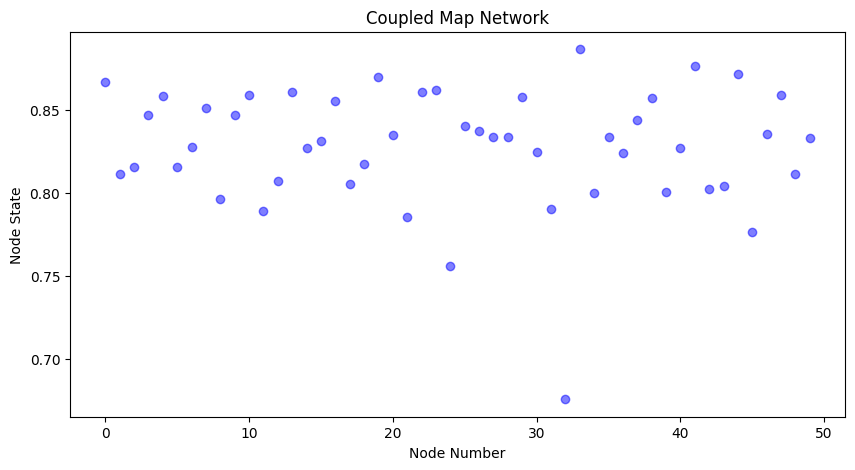

In [ ]:
# Plot the network state across different nodes
plt.figure(figsize=(10, 5))
for i, state in enumerate(node_states):
    plt.plot(i, state, "bo", alpha=0.5)
plt.xlabel("Node Number")
plt.ylabel("Node State")
plt.title("Coupled Map Network")
plt.show()

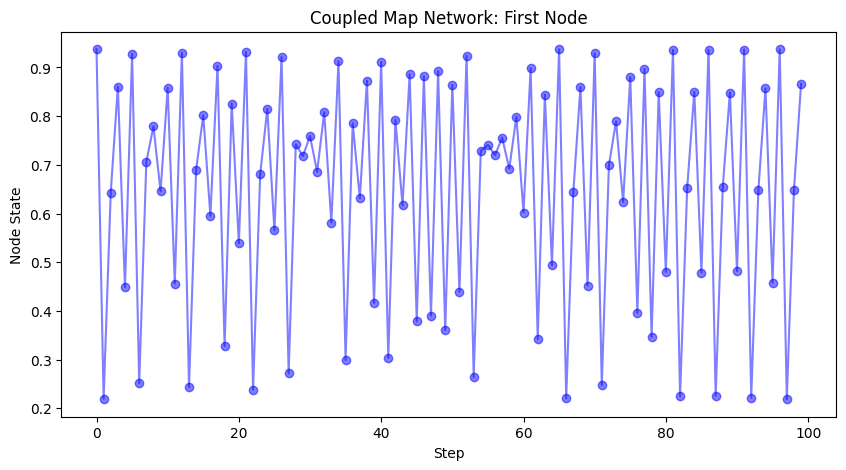

In [ ]:
# Plot the network state of the first node across time
plt.figure(figsize=(10, 5))
plt.plot(range(num_steps), first_node, "bo-", alpha=0.5)
plt.xlabel("Step")
plt.ylabel("Node State")
plt.title("Coupled Map Network: First Node")
plt.show()